<a href="https://colab.research.google.com/github/basketbob/ML/blob/main/netology_DS/DZ4_stpy32_KuzinVS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

df = pd.read_csv('water.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


#Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

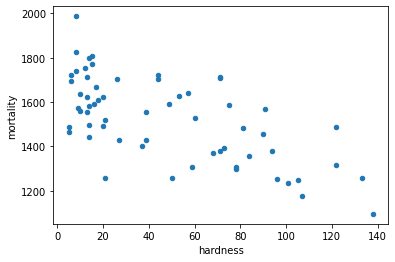

In [ ]:
#Построить точечный график
df.plot(kind='scatter', x='hardness', y='mortality')

'''
На данном графике видно, что есть вероятность зависимости жесткости воды и смертностью.
Чем выше жесткость воды, тем смертность ниже.
'''

In [ ]:
#Рассчитать коэффициенты корреляции Пирсона и Спирмена
df[['hardness', 'mortality']].corr()

# коэффициент = -0.65, что является высоким отрицательным уровнем связи

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [ ]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [ ]:
#Построить модель линейной регрессии
X = df[['mortality']]
y = df['hardness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)

[-0.12670202]
239.3678426140957


In [ ]:
#Рассчитать коэффициент детерминации
model.score(X_test, y_test)

0.4948982822876836

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


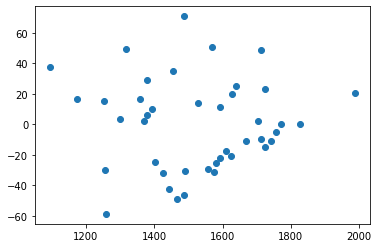

In [ ]:
#Вывести график остатков
X_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_const)
results = model.fit()
plt.scatter(X_const.iloc[:, 1], results.resid)

#Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [ ]:
df_south = df[df.location == 'South']
df_north = df[df.location == 'North']

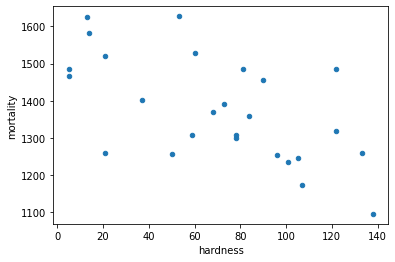

In [ ]:
#Построить точечный график SOUTH
df_south.plot(kind='scatter', x='hardness', y='mortality')

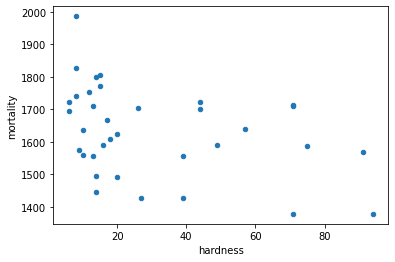

In [ ]:
#Построить точечный график NORTH
df_north.plot(kind='scatter', x='hardness', y='mortality')

#на двух графиках видно что на севере более мягкая вода, за счет этого и сметртность больше

In [ ]:
#Рассчитать коэффициенты корреляции Пирсона SOUTH
df_south[['hardness', 'mortality']].corr()

#тут корреляция сохраняется, как и на общем графике

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [ ]:
#Рассчитать коэффициенты корреляции Пирсона NORTH
df_north[['hardness', 'mortality']].corr()

#а на севере зависимость упала

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [ ]:
#Рассчитать коэффициенты корреляции Спирмена SOUTH
df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [ ]:
#Рассчитать коэффициенты корреляции Спирмена NORTH
df_north[['hardness', 'mortality']].corr(method='spearman')

#в данном случае уровень тоже упал, но не так сильно как у Пирсона

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [ ]:
#Построить модель линейной регрессии SOUTH
X = df_south[['mortality']]
y = df_south['hardness']

X_train_south, X_test_south, y_train_south, y_test_south = train_test_split(X, y, test_size=0.30, random_state=42)

model_south = LinearRegression()
model_south.fit(X_train_south, y_train_south)

print(model_south.coef_)
print(model_south.intercept_)

[-0.18112812]
324.1190746235986


In [ ]:
#Построить модель линейной регрессии NORTH
X = df_north[['mortality']]
y = df_north['hardness']

X_train_north, X_test_north, y_train_north, y_test_north = train_test_split(X, y, test_size=0.30, random_state=42)

model_north = LinearRegression()
model_north.fit(X_train_south, y_train_south)

print(model_north.coef_)
print(model_north.intercept_)

[-0.18112812]
324.1190746235986


In [ ]:
#Рассчитать коэффициент детерминации SOUTH
model_south.score(X_test_south, y_test_south)

# здесь очень низкая связь, сильно отличается от общего показателя

-0.05226615794483802

In [ ]:
#Рассчитать коэффициент детерминации NORTH
model_north.score(X_test_north, y_test_north)

#в данном случае показатель вышел за пределы от 0 до 1, о чем это может говорить не понятно.

-1.4118087743526204

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


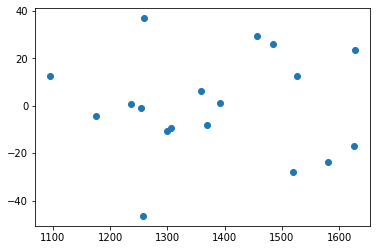

In [ ]:
#Вывести график остатков SOUTH
X_const_south = sm.add_constant(X_train_south)
model = sm.OLS(y_train_south, X_const_south)
results = model.fit()
plt.scatter(X_const_south.iloc[:, 1], results.resid)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


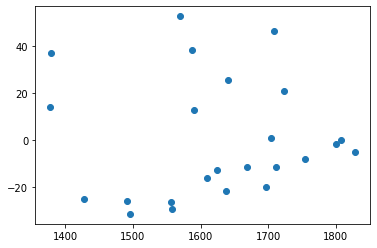

In [ ]:
#Вывести график остатков NORTH
X_const_north = sm.add_constant(X_train_north)
model = sm.OLS(y_train_north, X_const_north)
results = model.fit()
plt.scatter(X_const_north.iloc[:, 1], results.resid)